<a href="https://colab.research.google.com/github/moha6998/ML_Health/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#COMP90089: Machine Learning Applications for Health Semester 2, 2023
#Assignment 2 - 1390758 - Mohit Rudraraju Suresh

In [1]:
#Importing necasary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Reading the input file, ensure to replace with your appropriate filename and path when running locally
cohort_df = pd.read_csv('/content/hypotension_patients (1).csv')

#Checking for missing values
nan_counts_per_column = cohort_df.isna().sum()
print(nan_counts_per_column)

total_nan_count = cohort_df.isna().sum().sum()
print(total_nan_count)


ID                               0
anchor_age                       0
gender                           0
dod                           1816
apsiii                           0
LoS                              0
charlson_comorbidity_index       0
dtype: int64
1816


In [2]:
cohort_df['dod'] = cohort_df['dod'].astype('datetime64[ns]')  # Converting 'dod' to datetime format

# Summary statistics for continuous variables
summary_continuous = cohort_df[['anchor_age', 'apsiii', 'LoS', 'charlson_comorbidity_index']].describe()

# Summary statistics for categorical variables
summary_gender = cohort_df['gender'].value_counts(normalize=True) * 100

# Summary statistics for date variables ('dod')
survival_count = cohort_df['dod'].isna().sum()
deceased_count = cohort_df['dod'].notna().sum()
mortality_rate = (deceased_count / (survival_count + deceased_count)) * 100

# Correlation between variables
correlation_matrix = cohort_df[['apsiii', 'LoS', 'charlson_comorbidity_index']].corr()

summary_continuous, summary_gender, survival_count, deceased_count, mortality_rate, correlation_matrix

(        anchor_age       apsiii          LoS  charlson_comorbidity_index
 count  5106.000000  5106.000000  5106.000000                  5106.00000
 mean     65.552683    60.314532     7.053651                     5.21700
 std      15.235907    28.860171     8.432716                     2.57691
 min      18.000000     3.000000     0.040000                     0.00000
 25%      56.000000    38.000000     1.960000                     4.00000
 50%      67.000000    53.000000     4.130000                     5.00000
 75%      77.000000    78.000000     8.960000                     7.00000
 max      91.000000   189.000000   103.500000                    19.00000,
 M    55.875441
 F    44.124559
 Name: gender, dtype: float64,
 1816,
 3290,
 64.4339992166079,
                               apsiii       LoS  charlson_comorbidity_index
 apsiii                      1.000000  0.202155                    0.154213
 LoS                         0.202155  1.000000                   -0.021115
 charlson

#**Q1 Summary Statistics**
Describe via summary statistics the main properties of the profound hypotension cohort. (Up to 200 words. Also provide plots for visualising the distributions).

The profound hypotension cohort consists of 5,106 patients with a balanced gender distribution of approximately 55.88% male and 44.12% female. Patients in this cohort tend to be of older age, with an average (mean) age of approximately 65.55 years. Notably, the cohort's age spans a wide range, from young adults of 18 years to senior patients up to 91 years. The median age, representing the middle point, is 67 years, indicating that a majority of patients fall in the senior age category.

Clinically, the Acute Physiology Score III (apsiii) is a significant parameter, indicative of the severity of illness. In this cohort, the average apsiii score is 60.31, suggesting a moderate to high severity level amongst the patients. Furthermore, the wide range from a minimum score of 3 to a maximum of 189 underscores the varied severity levels present.

Another crucial factor in understanding the clinical status of patients is the Length of Stay (LoS) in the ICU. On average, patients stayed approximately 7.05 days, but this varied considerably, with some patients staying for as little as a few hours (0.04 days) to some extending over 103 days.

The cohort also has an average Charlson Comorbidity Index of 5.21, an index used to predict the ten-year mortality for a patient. The positive correlation between apsiii and the Charlson Comorbidity Index (0.154) suggests that patients with higher severity often had multiple comorbid conditions. Interestingly, there's a slight negative correlation between LoS and the Charlson Comorbidity Index, hinting that longer stays might not necessarily be associated with higher comorbidity scores in this dataset.

In summary, the profound hypotension cohort represents a clinically diverse group, primarily characterized by elderly patients with varied severity levels and comorbidities.

### Anchor Ages Graph

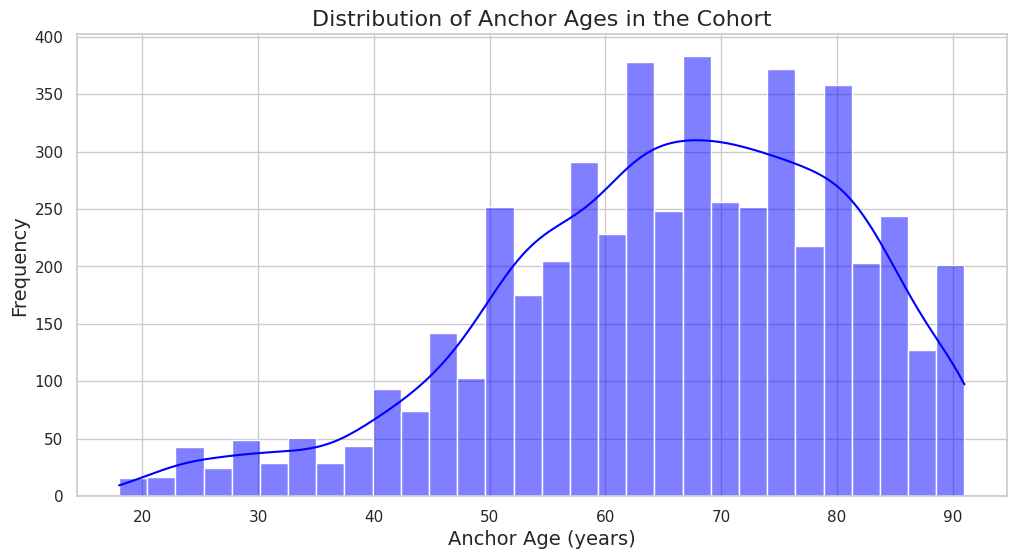

In [3]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plotting the distribution of 'anchor_age'
sns.histplot(cohort_df['anchor_age'], bins=30, kde=True, color='blue')

plt.title('Distribution of Anchor Ages in the Cohort', fontsize=16)
plt.xlabel('Anchor Age (years)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

### Kaplan-Meier Survival Curve

In [5]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 9.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=3bf94d1076d172c3749055cde3e3e2b201ea93df15160faea39bbce1e58b8ed4
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


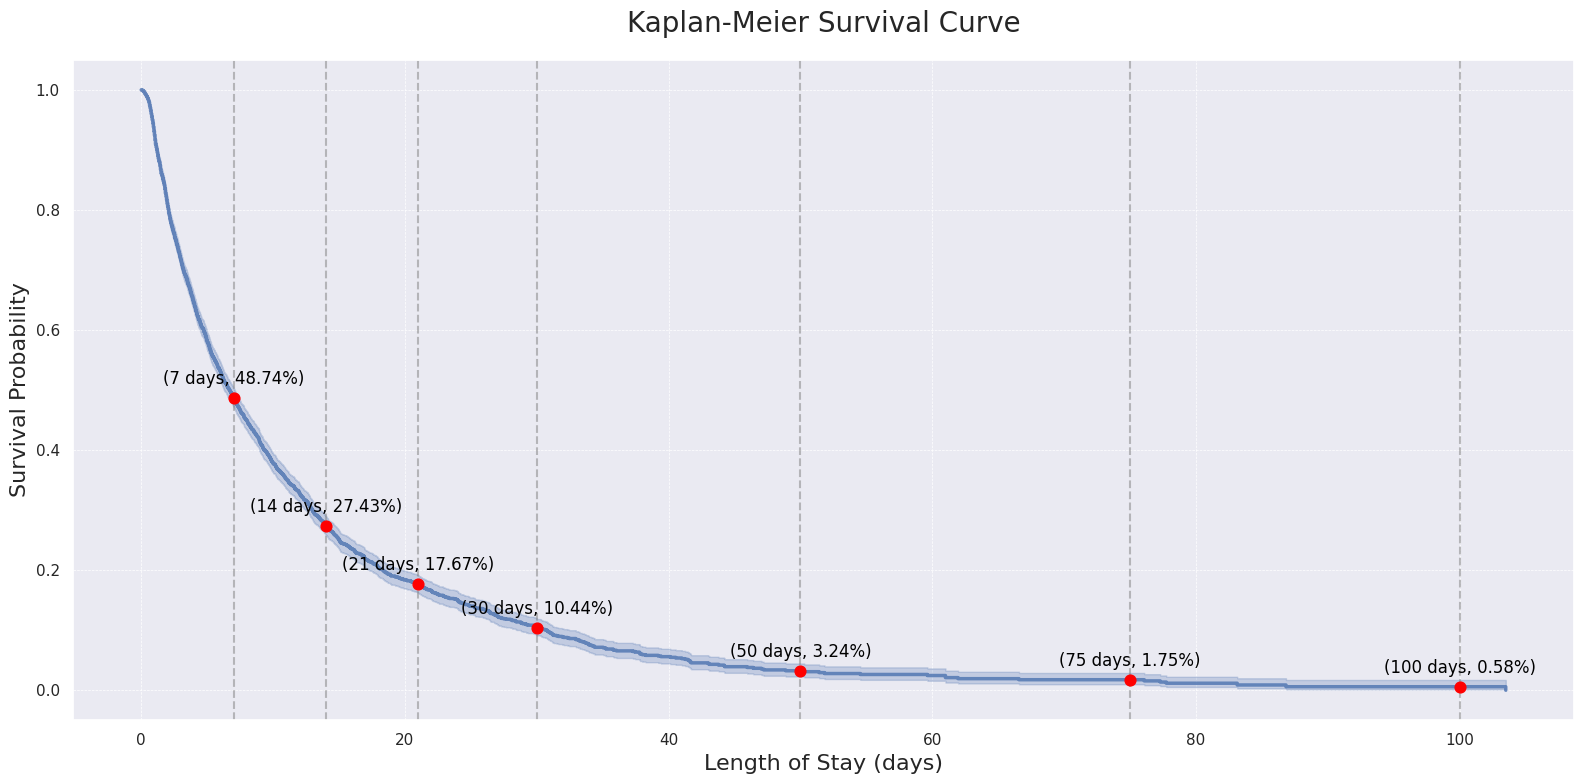

[(7, 0.48740412110263504), (14, 0.2743015236469951), (21, 0.17669617104281943), (30, 0.10442852555586782), (50, 0.03242614853511414), (75, 0.017499826193553662), (100, 0.005833275397851219)]


In [6]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_theme()

# Create an 'event' column
cohort_df['event'] = ~cohort_df['dod'].isna()

# Initialize the Kaplan-Meier Fitter
kmf = KaplanMeierFitter()

# Fit the data into the model
kmf.fit(cohort_df['LoS'], event_observed=cohort_df['event'])

# Initialize a list to store intersection coordinates
intersection_points = []

# Generate Kaplan-Meier Survival Curve
plt.figure(figsize=(16, 8))
ax = kmf.plot(color='b', linewidth=2.5, alpha=0.8, legend=False)

# Add title and labels
plt.title('Kaplan-Meier Survival Curve', fontsize=20, pad=20)
plt.xlabel('Length of Stay (days)', fontsize=16)
plt.ylabel('Survival Probability', fontsize=16)

# Annotate intersection points and add vertical lines
for day in [7, 14, 21, 30, 50, 75, 100]:
    survival_prob = kmf.predict(day)
    intersection_points.append((day, survival_prob))
    plt.scatter(day, survival_prob, color='red', s=60, zorder=5)  # Add emphasis on intersection points
    plt.annotate(f"({day} days, {survival_prob*100:.2f}%)", (day, survival_prob), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, color='black')
    plt.axvline(x=day, color='grey', linestyle='--', alpha=0.5)

# Modify grid aesthetics
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Remove any labels or legends that are automatically added
if plt.legend() is not None:
    plt.legend().remove()

plt.tight_layout()
plt.show()

# Display intersection points for user's reference
print(intersection_points)


### APSII and Charlson Comorbidity Index

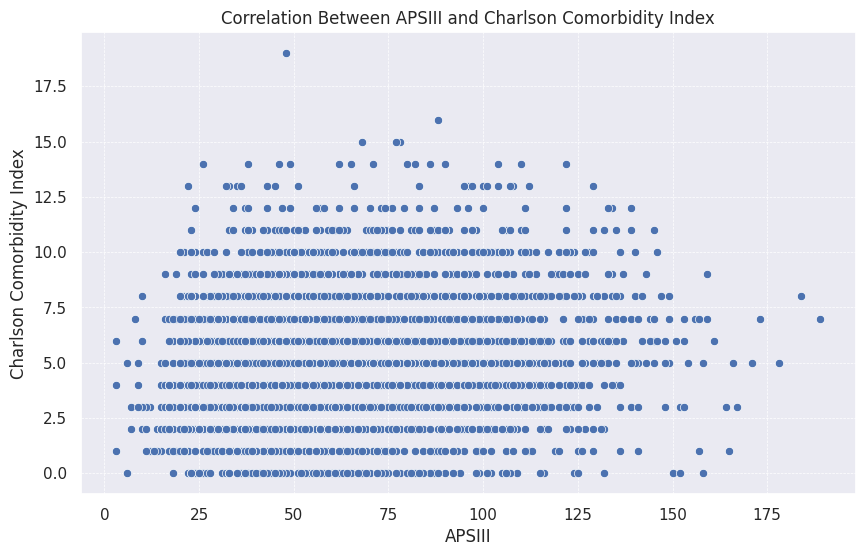

0.15421333516078342

In [7]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation between APSIII and Charlson Comorbidity Index
correlation_value = cohort_df['apsiii'].corr(cohort_df['charlson_comorbidity_index'])

# Plotting the correlation graph
plt.figure(figsize=(10, 6))
sns.scatterplot(x='apsiii', y='charlson_comorbidity_index', data=cohort_df)
plt.title('Correlation Between APSIII and Charlson Comorbidity Index')
plt.xlabel('APSIII')
plt.ylabel('Charlson Comorbidity Index')
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

correlation_value

### Distributions

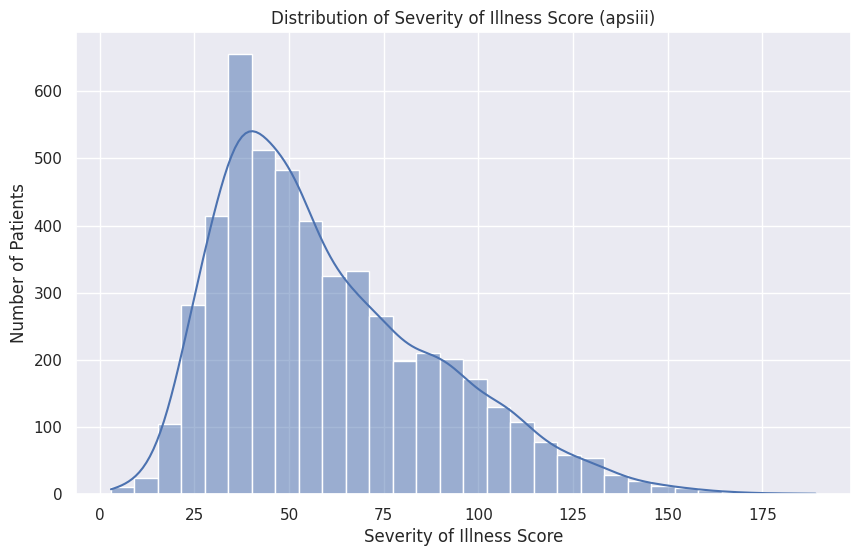

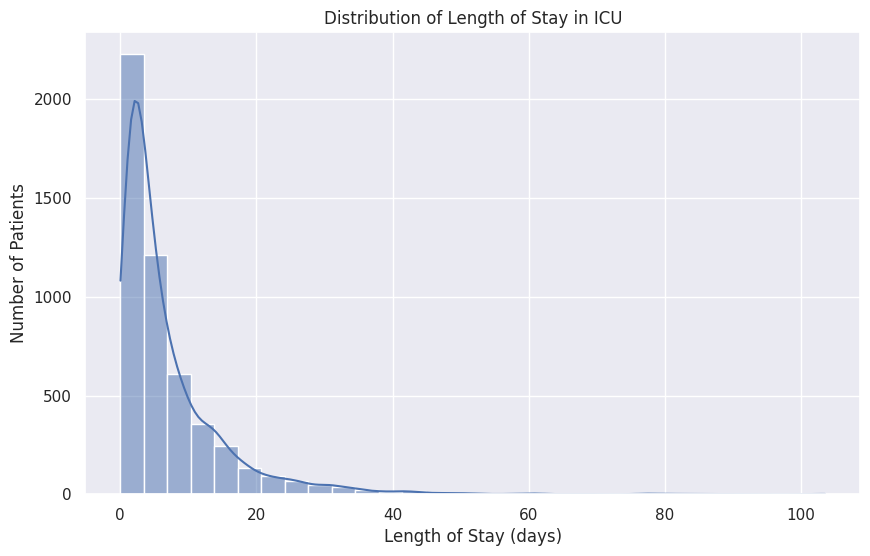

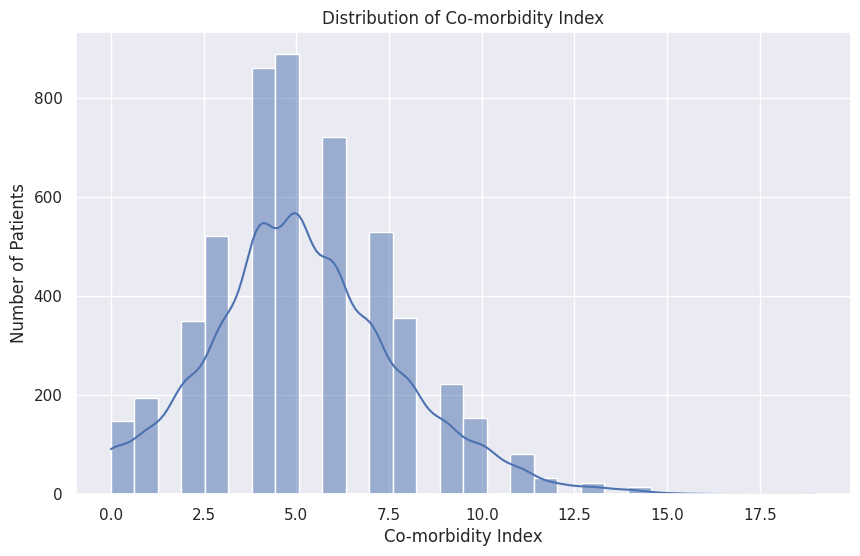

In [8]:
# 4. apsiii
plt.figure(figsize=(10, 6))
sns.histplot(cohort_df['apsiii'], bins=30, kde=True)
plt.title('Distribution of Severity of Illness Score (apsiii)')
plt.xlabel('Severity of Illness Score')
plt.ylabel('Number of Patients')
plt.show()

# 5. LoS
plt.figure(figsize=(10, 6))
sns.histplot(cohort_df['LoS'], bins=30, kde=True)
plt.title('Distribution of Length of Stay in ICU')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Number of Patients')
plt.show()

# 6. charlson_comorbidity_index
plt.figure(figsize=(10, 6))
sns.histplot(cohort_df['charlson_comorbidity_index'], bins=30, kde=True)
plt.title('Distribution of Co-morbidity Index')
plt.xlabel('Co-morbidity Index')
plt.ylabel('Number of Patients')
plt.show()

### Correlation Matrix

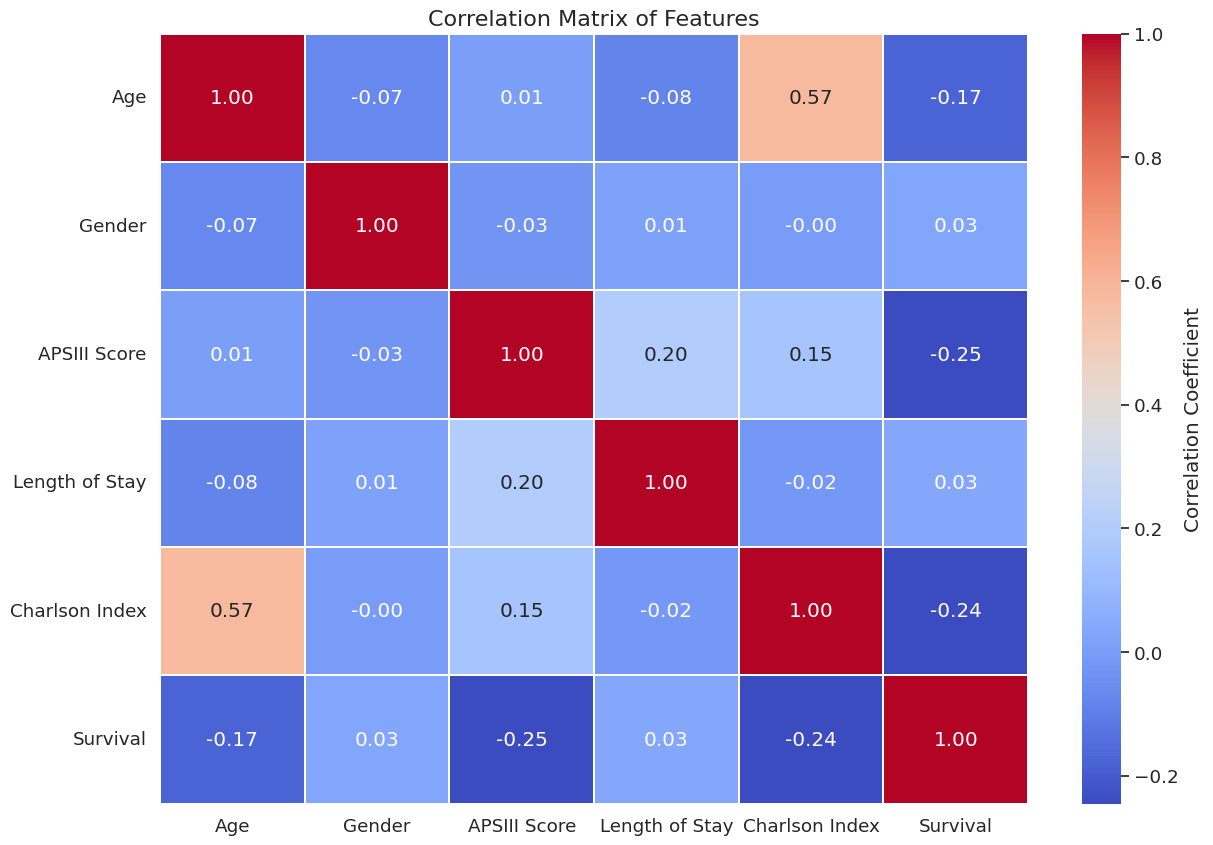

In [9]:
# Rename features for better readability in the graph
feature_names = {
    'anchor_age': 'Age',
    'gender_numeric': 'Gender',
    'apsiii': 'APSIII Score',
    'LoS': 'Length of Stay',
    'charlson_comorbidity_index': 'Charlson Index',
    'survival': 'Survival'
}

# Convert 'gender' to a numeric variable (F:0, M:1) and 'dod' to a binary outcome variable (1: died, 0: survived)
cohort_df['gender_numeric'] = cohort_df['gender'].map({'F': 0, 'M': 1})
cohort_df['survival'] = cohort_df['dod'].isna().astype(int)

# Calculate the correlation matrix including 'gender_numeric' and 'survival'
correlation_matrix_with_gender_survival = cohort_df[['anchor_age', 'gender_numeric', 'apsiii', 'LoS', 'charlson_comorbidity_index', 'survival']].corr()


# Update the correlation matrix with the renamed features
correlation_matrix_renamed = correlation_matrix_with_gender_survival.rename(columns=feature_names, index=feature_names)

# Plotting the enhanced correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix_renamed, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.3, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()


### Other Graphs

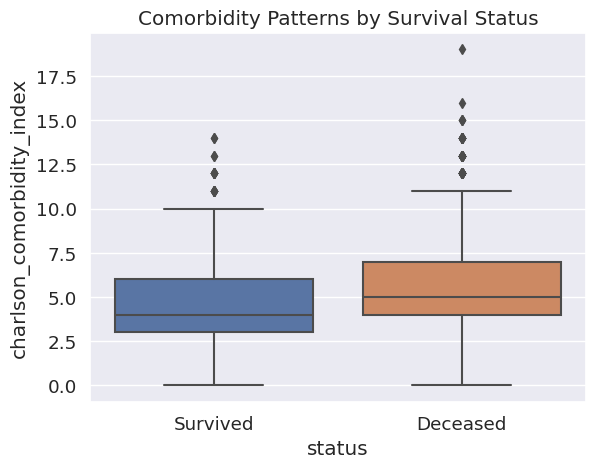

In [10]:
# Create a 'status' column: 'Deceased' if 'dod' is not null, 'Survived' otherwise
cohort_df['status'] = np.where(cohort_df['dod'].isna(), 'Survived', 'Deceased')

# Create a boxplot
sns.boxplot(x='status', y='charlson_comorbidity_index', data=cohort_df)
plt.title('Comorbidity Patterns by Survival Status')
plt.show()


<Axes: >

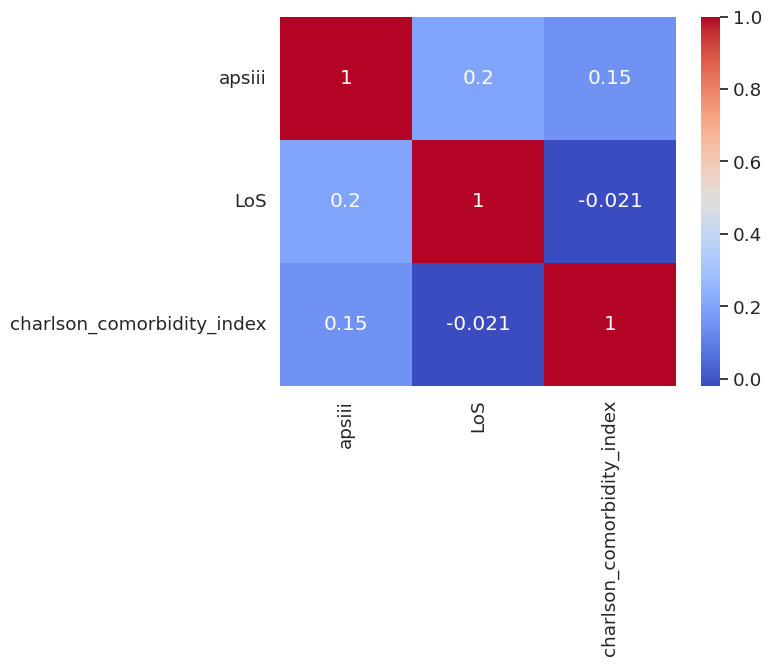

In [11]:
correlation_matrix = cohort_df[['apsiii', 'LoS', 'charlson_comorbidity_index']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


Text(0.5, 1.0, 'Distribution of Length of Stay')

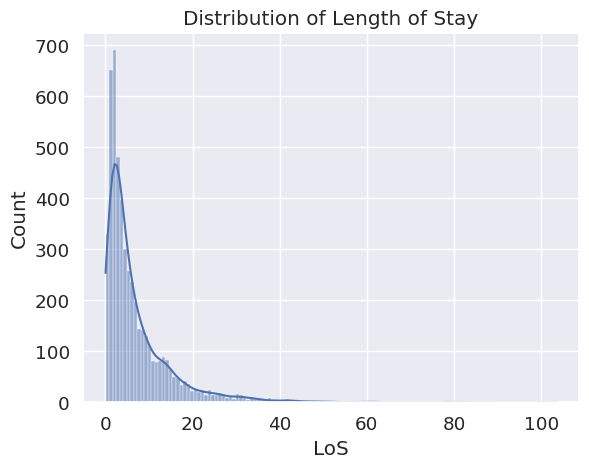

In [12]:
sns.histplot(cohort_df['LoS'], kde=True)
plt.title('Distribution of Length of Stay')


## Exploring Dataset

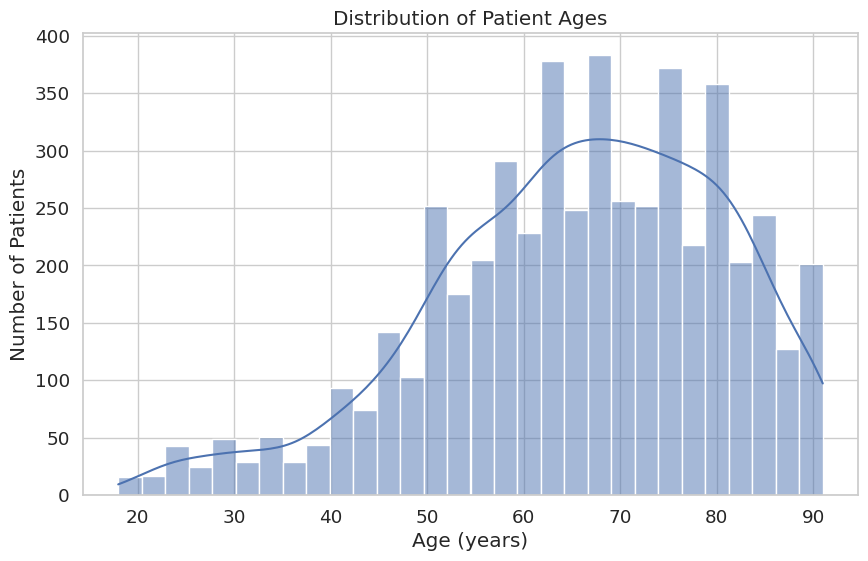

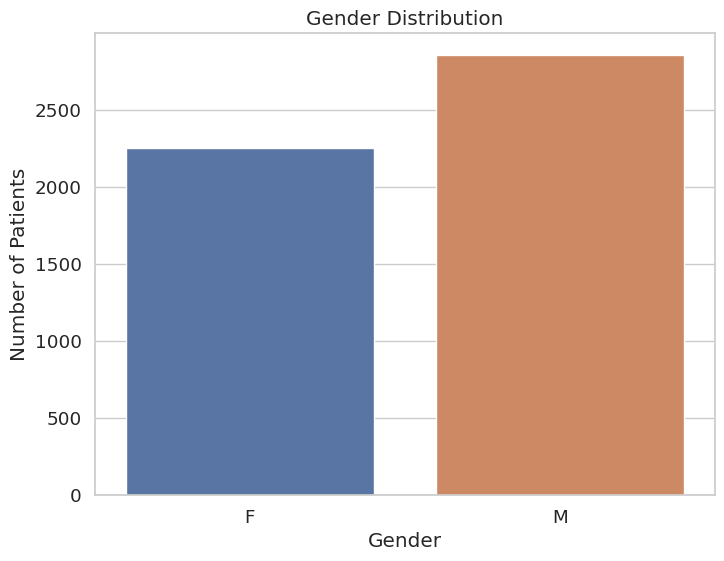

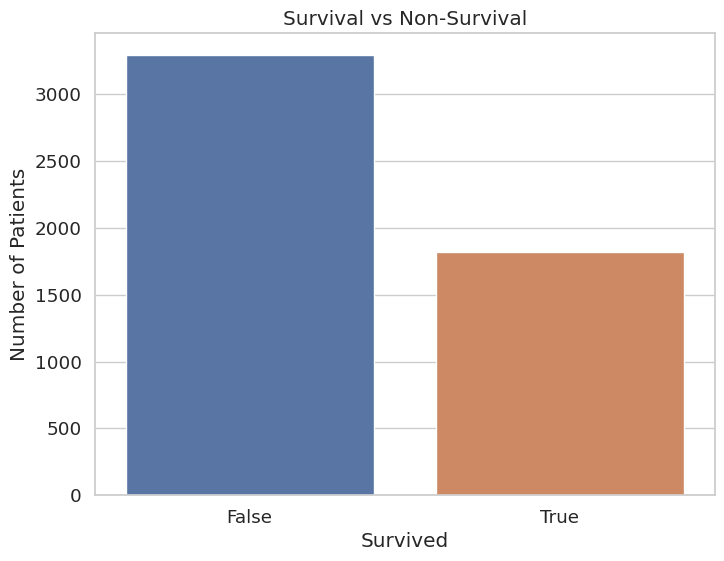

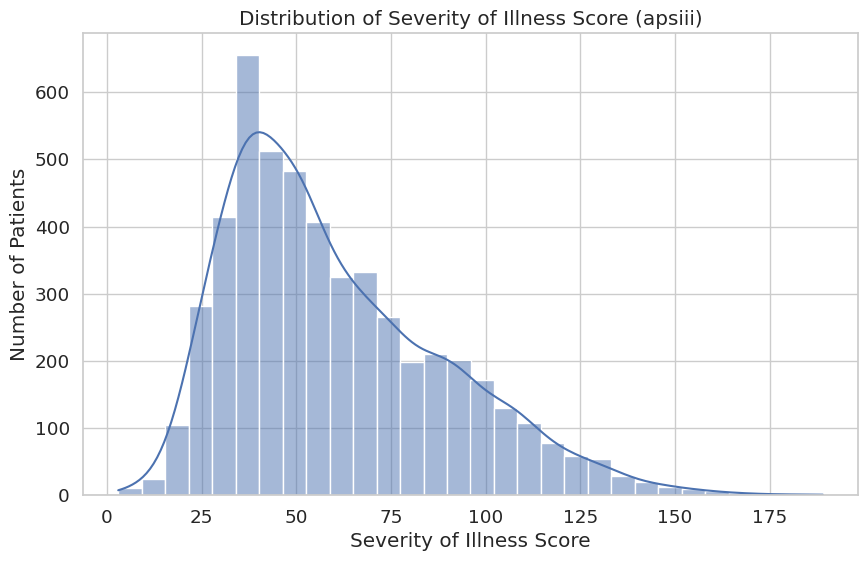

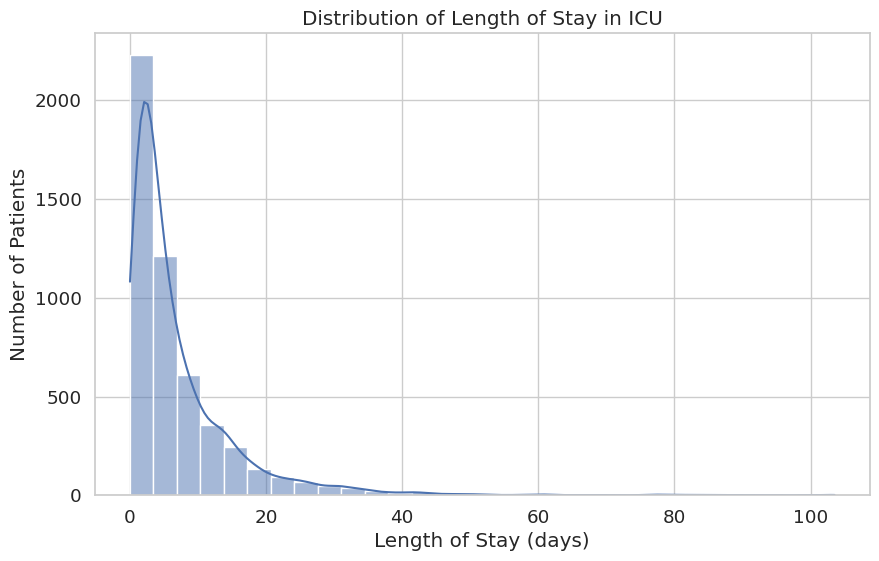

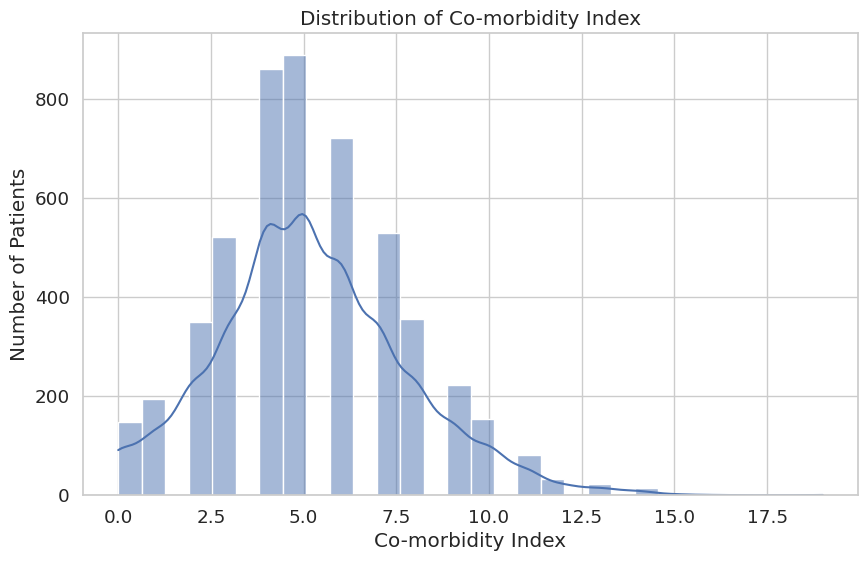

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn plots
sns.set_style("whitegrid")

# 1. anchor_age
plt.figure(figsize=(10, 6))
sns.histplot(cohort_df['anchor_age'], bins=30, kde=True)
plt.title('Distribution of Patient Ages')
plt.xlabel('Age (years)')
plt.ylabel('Number of Patients')
plt.show()

# 2. gender
plt.figure(figsize=(8, 6))
sns.countplot(data=cohort_df, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()

# 3. dod
cohort_df['Survival'] = cohort_df['dod'].isna()
plt.figure(figsize=(8, 6))
sns.countplot(data=cohort_df, x='Survival')
plt.title('Survival vs Non-Survival')
plt.xlabel('Survived')
plt.ylabel('Number of Patients')
plt.show()

# 4. apsiii
plt.figure(figsize=(10, 6))
sns.histplot(cohort_df['apsiii'], bins=30, kde=True)
plt.title('Distribution of Severity of Illness Score (apsiii)')
plt.xlabel('Severity of Illness Score')
plt.ylabel('Number of Patients')
plt.show()

# 5. LoS
plt.figure(figsize=(10, 6))
sns.histplot(cohort_df['LoS'], bins=30, kde=True)
plt.title('Distribution of Length of Stay in ICU')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Number of Patients')
plt.show()

# 6. charlson_comorbidity_index
plt.figure(figsize=(10, 6))
sns.histplot(cohort_df['charlson_comorbidity_index'], bins=30, kde=True)
plt.title('Distribution of Co-morbidity Index')
plt.xlabel('Co-morbidity Index')
plt.ylabel('Number of Patients')
plt.show()


In [14]:
# Summary statistics for numerical columns
numerical_summary = cohort_df[['anchor_age', 'apsiii', 'LoS', 'charlson_comorbidity_index']].describe()

# Count for each gender
gender_counts = cohort_df['gender'].value_counts()

# Percentage of patients who passed away
death_percentage = cohort_df['dod'].notna().mean() * 100

numerical_summary, gender_counts, death_percentage


(        anchor_age       apsiii          LoS  charlson_comorbidity_index
 count  5106.000000  5106.000000  5106.000000                  5106.00000
 mean     65.552683    60.314532     7.053651                     5.21700
 std      15.235907    28.860171     8.432716                     2.57691
 min      18.000000     3.000000     0.040000                     0.00000
 25%      56.000000    38.000000     1.960000                     4.00000
 50%      67.000000    53.000000     4.130000                     5.00000
 75%      77.000000    78.000000     8.960000                     7.00000
 max      91.000000   189.000000   103.500000                    19.00000,
 M    2853
 F    2253
 Name: gender, dtype: int64,
 64.4339992166079)

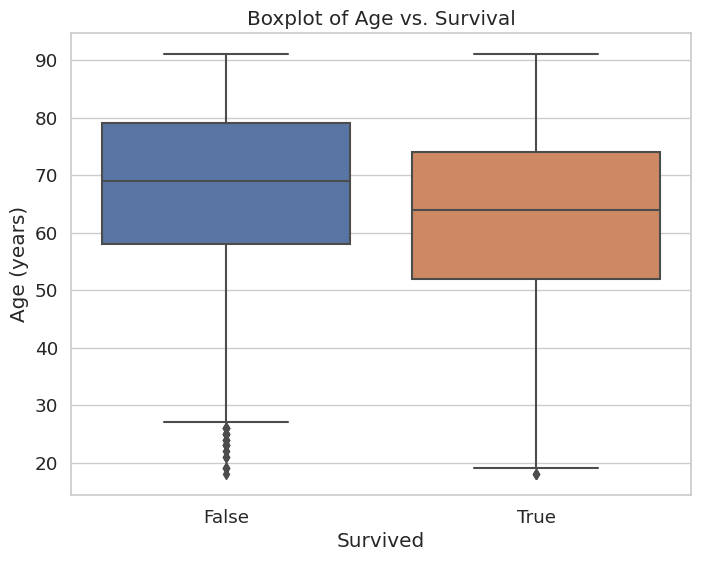

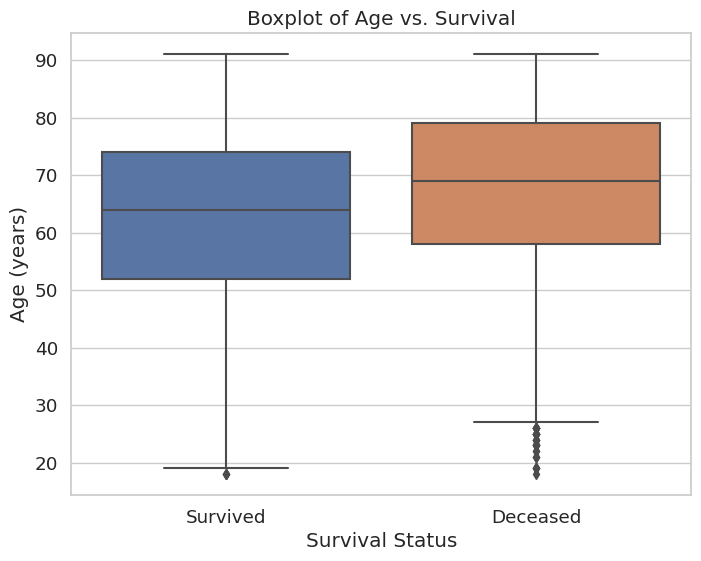

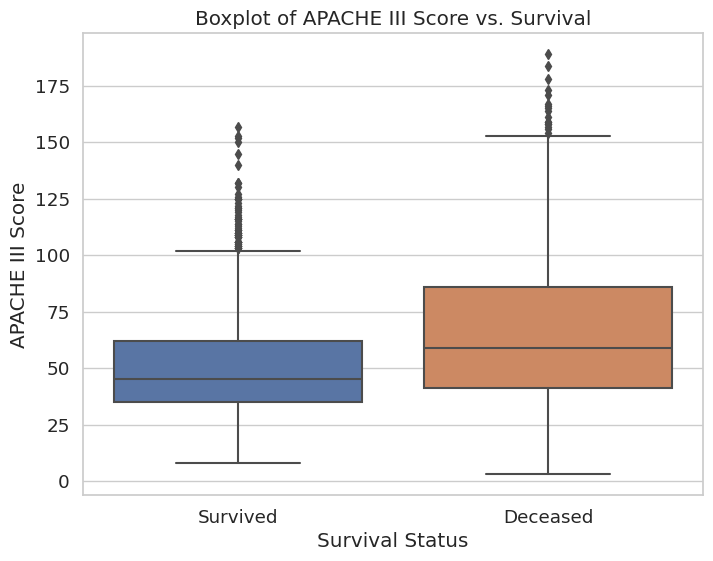

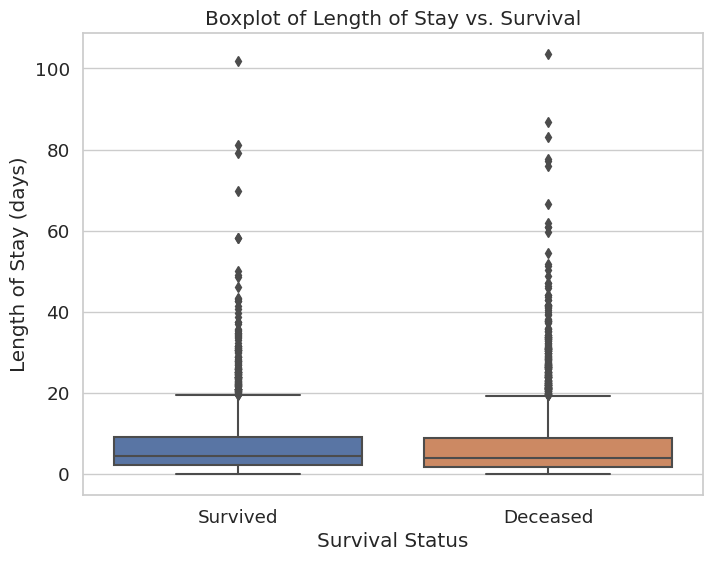

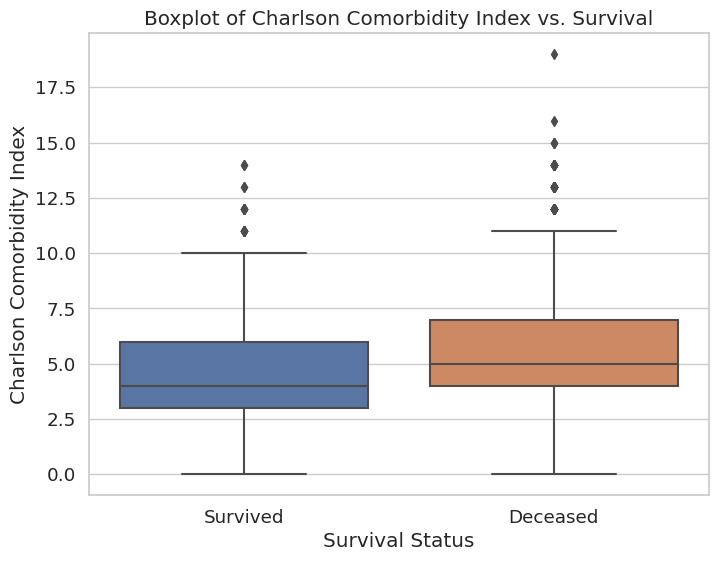

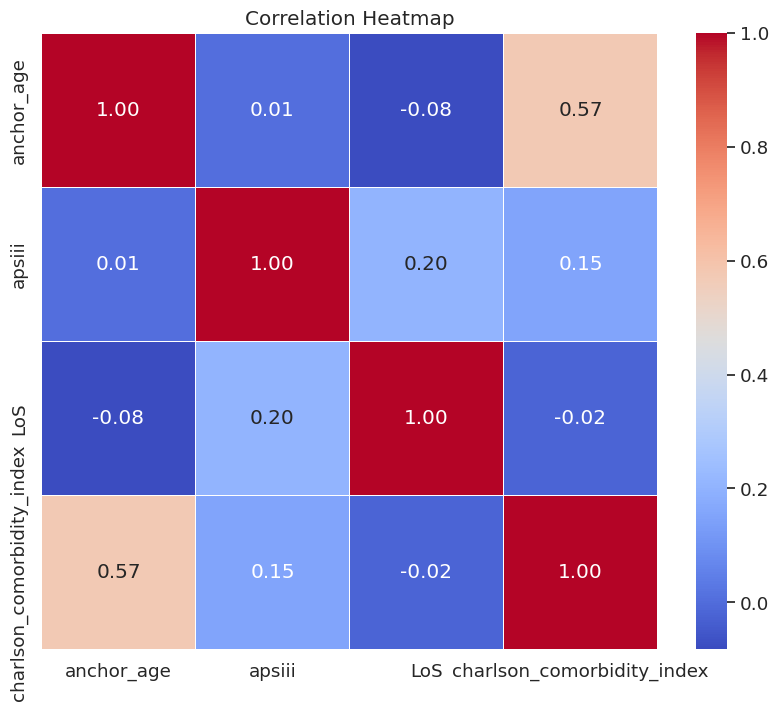

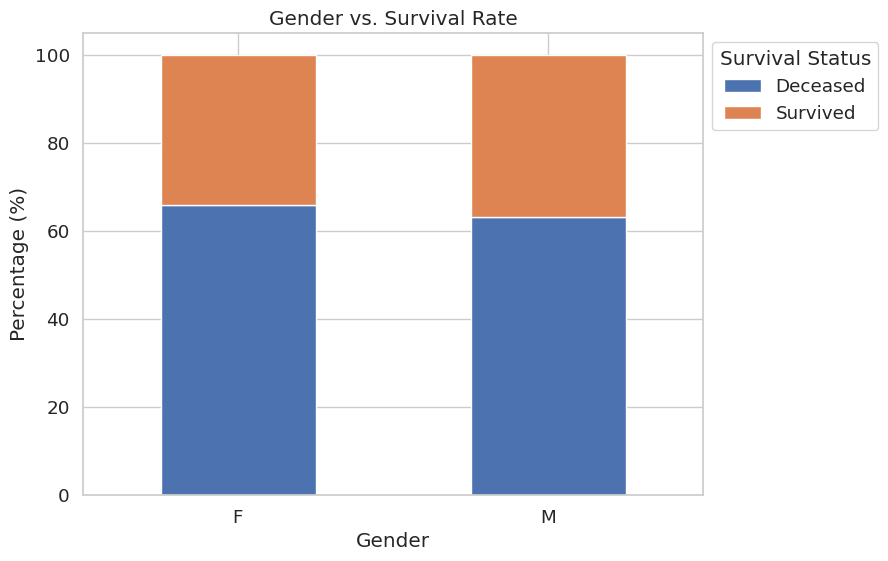

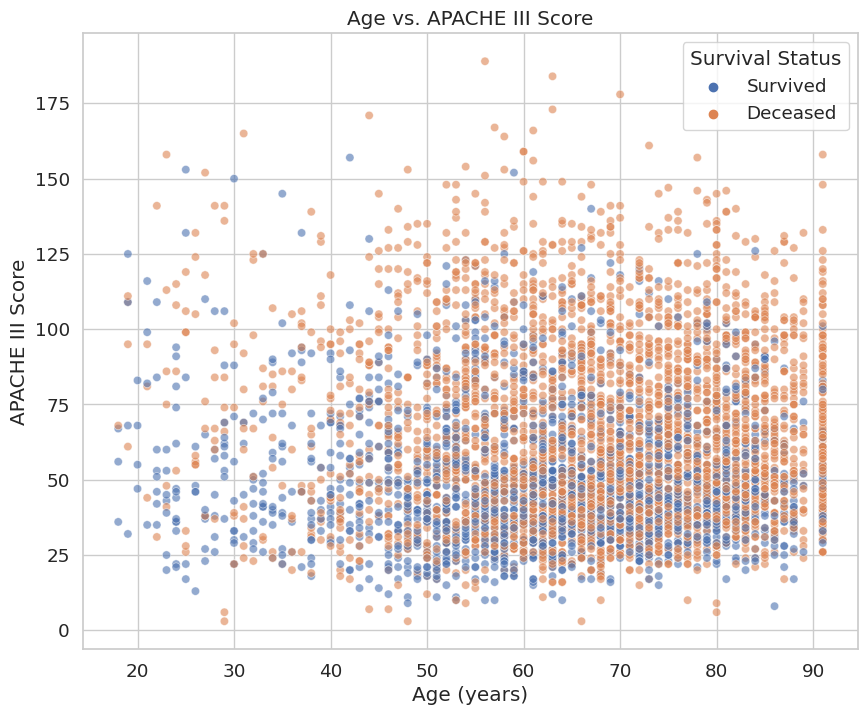

In [15]:
# Boxplot of Age vs. Survival
plt.figure(figsize=(8, 6))
sns.boxplot(data=cohort_df, x='Survival', y='anchor_age')
plt.title('Boxplot of Age vs. Survival')
plt.xlabel('Survived')
plt.ylabel('Age (years)')
plt.show()

# Setting the style for seaborn plots
sns.set_style("whitegrid")

# Creating a 'Survival' column for visualization purposes
cohort_df['Survival'] = cohort_df['dod'].isna().map({True: 'Survived', False: 'Deceased'})

# Boxplot of Age vs. Survival
plt.figure(figsize=(8, 6))
sns.boxplot(data=cohort_df, x='Survival', y='anchor_age')
plt.title('Boxplot of Age vs. Survival')
plt.xlabel('Survival Status')
plt.ylabel('Age (years)')
plt.show()

# Boxplot of APACHE III Score vs. Survival
plt.figure(figsize=(8, 6))
sns.boxplot(data=cohort_df, x='Survival', y='apsiii')
plt.title('Boxplot of APACHE III Score vs. Survival')
plt.xlabel('Survival Status')
plt.ylabel('APACHE III Score')
plt.show()

# Boxplot of Length of Stay vs. Survival
plt.figure(figsize=(8, 6))
sns.boxplot(data=cohort_df, x='Survival', y='LoS')
plt.title('Boxplot of Length of Stay vs. Survival')
plt.xlabel('Survival Status')
plt.ylabel('Length of Stay (days)')
plt.show()

# Boxplot of Charlson Comorbidity Index vs. Survival
plt.figure(figsize=(8, 6))
sns.boxplot(data=cohort_df, x='Survival', y='charlson_comorbidity_index')
plt.title('Boxplot of Charlson Comorbidity Index vs. Survival')
plt.xlabel('Survival Status')
plt.ylabel('Charlson Comorbidity Index')
plt.show()

# Correlation Heatmap for numerical variables
correlation_matrix = cohort_df[['anchor_age', 'apsiii', 'LoS', 'charlson_comorbidity_index']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title('Correlation Heatmap')
plt.show()

# Gender vs. Survival Rate
gender_survival_rate = cohort_df.groupby('gender')['Survival'].value_counts(normalize=True).unstack() * 100

gender_survival_rate.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Gender vs. Survival Rate')
plt.ylabel('Percentage (%)')
plt.xlabel('Gender')
plt.legend(title='Survival Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

# Scatterplot of Age vs. APACHE III Score
plt.figure(figsize=(10, 8))
sns.scatterplot(data=cohort_df, x='anchor_age', y='apsiii', hue='Survival', alpha=0.6)
plt.title('Age vs. APACHE III Score')
plt.xlabel('Age (years)')
plt.ylabel('APACHE III Score')
plt.legend(title='Survival Status')
plt.show()


# 2. K-Means Clustering

Perform k-means clustering to identify subgroups of patients. Use the elbow criteria to identify an adequate number of clusters. Justify your choice. Since selecting clusters based on elbow criteria is a heuristic, you may select two different values of k for further analysis. (Up to 300 words. Provide a plot to justify the number of clusters chosen).

### Data Processing

In [16]:
cohort_df = pd.read_csv('/content/hypotension_patients (1).csv')

print(cohort_df.isna().sum())

ID                               0
anchor_age                       0
gender                           0
dod                           1816
apsiii                           0
LoS                              0
charlson_comorbidity_index       0
dtype: int64


In [17]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handle the 'dod' column by creating a binary 'survived' column: 1 if survived, 0 otherwise
cohort_df['survived'] = cohort_df['dod'].isna().astype(int)

# Drop the 'dod' and 'ID' columns as they won't be useful for clustering
cohort_df.drop(['dod', 'ID'], axis=1, inplace=True)

# Encode the 'gender' column
le = LabelEncoder()
cohort_df['gender'] = le.fit_transform(cohort_df['gender'])

# Standardise the numerical variables
scaler = StandardScaler()
cohort_df_scaled = pd.DataFrame(scaler.fit_transform(cohort_df), columns=cohort_df.columns)

# Display the first few rows of the preprocessed data
cohort_df_scaled.head()


,anchor_age,gender,apsiii,LoS,charlson_comorbidity_index,survived
0,0.948334,-1.125305,-0.149512,-0.006363,-0.472317,1.345984
1,0.423207,-1.125305,-0.392085,0.695734,0.303882,-0.742951
2,1.079616,0.888648,-0.496045,0.720639,-0.084217,-0.742951
3,1.539102,-1.125305,0.890084,-0.253045,0.691982,-0.742951
4,0.226285,-1.125305,1.444536,0.522581,1.080082,-0.742951


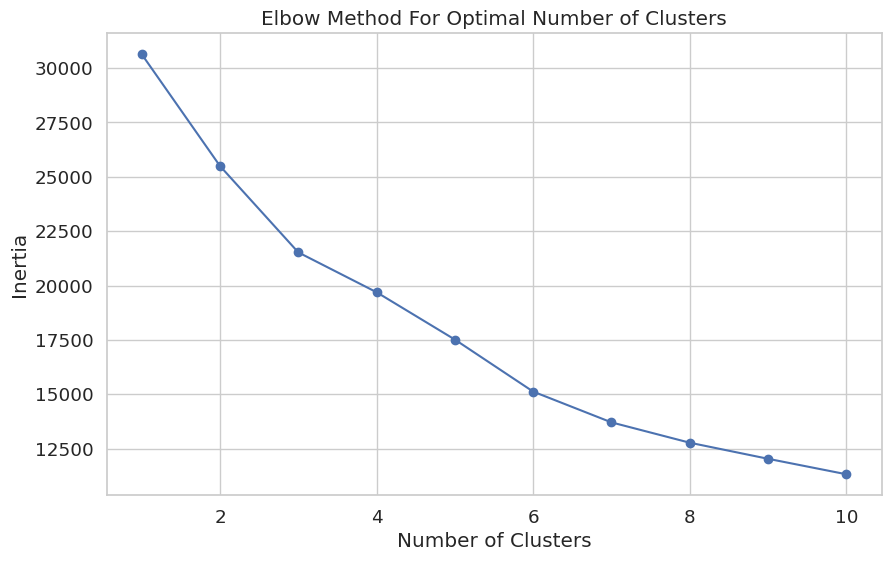

In [18]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
inertia_values = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(cohort_df_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia_values, marker='o')
plt.title("Elbow Method For Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


# 3. Cluster Properties

3. What are the main property differences between the clusters you identified? Are they related to patient outcomes? Provide visualisation plots that demonstrate these differences. (Up to 300 words. Also provide plots for visualising the distributions between clusters).

In [19]:
k_values = [3, 7]
cluster_labels = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    cluster_labels[k] = kmeans.fit_predict(cohort_df_scaled)

for k, labels in cluster_labels.items():
    cohort_df[f'Cluster_{k}'] = labels

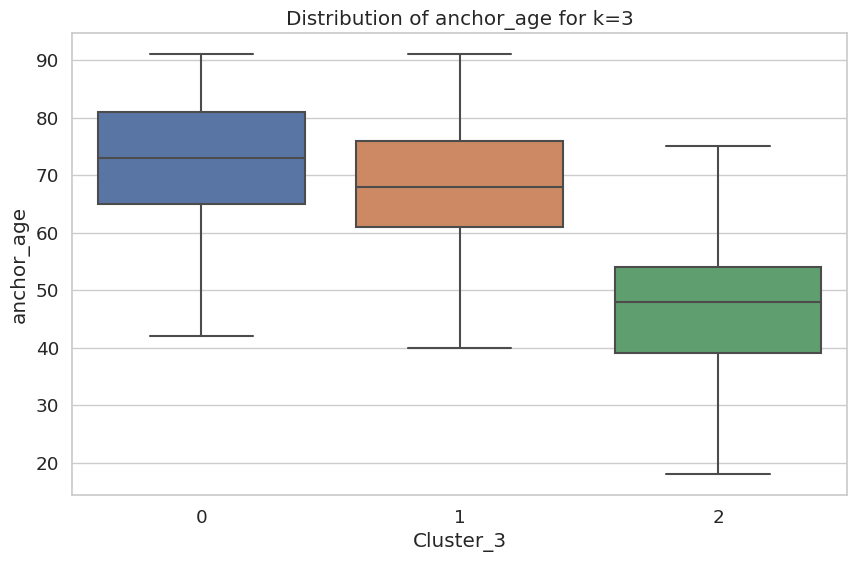

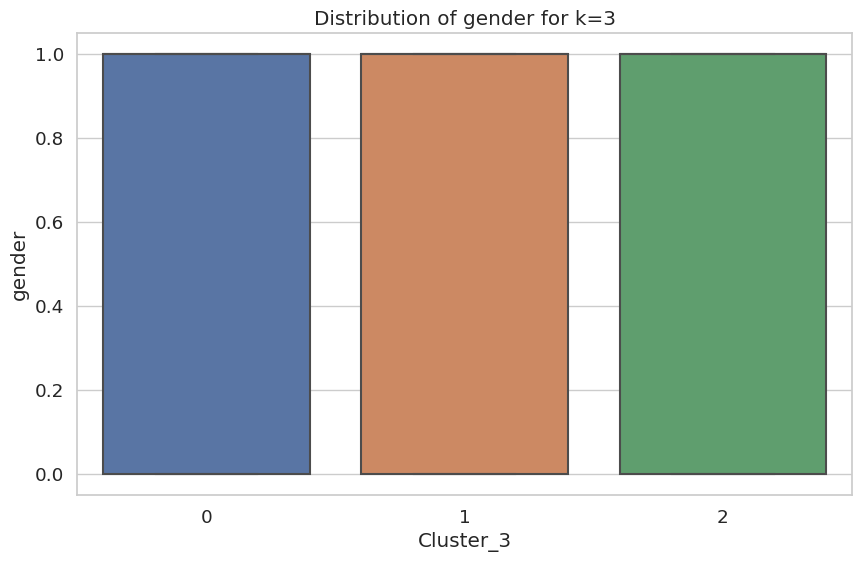

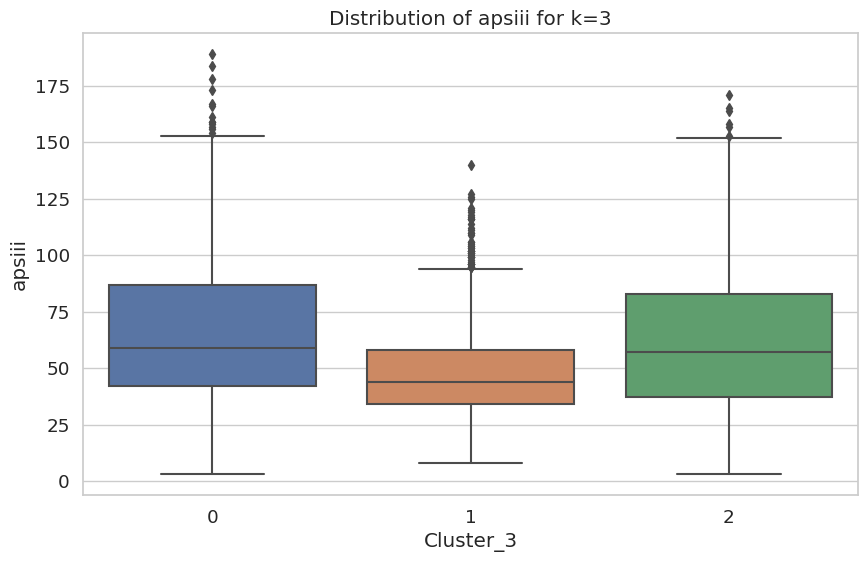

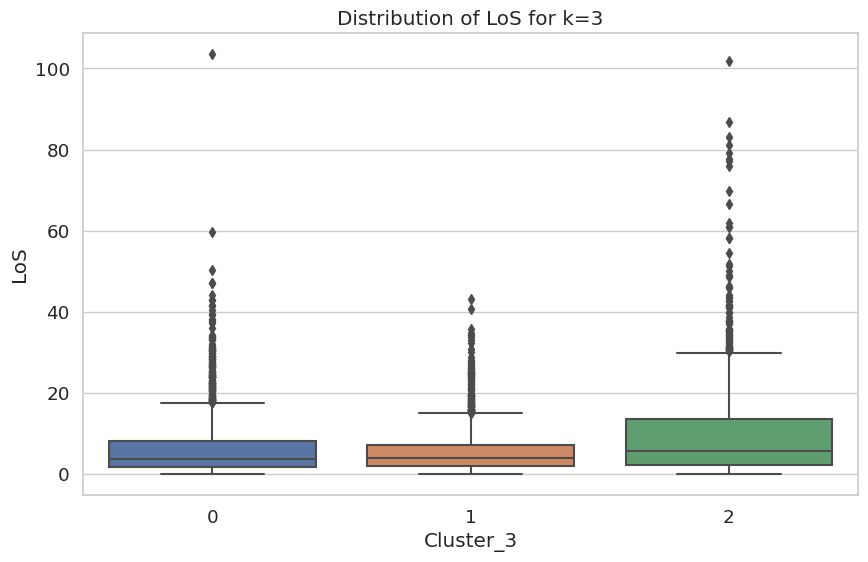

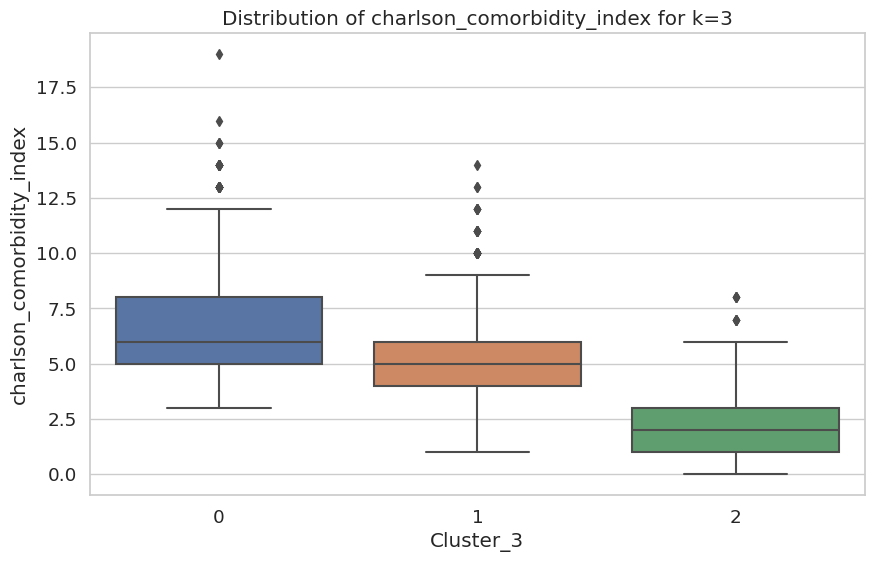

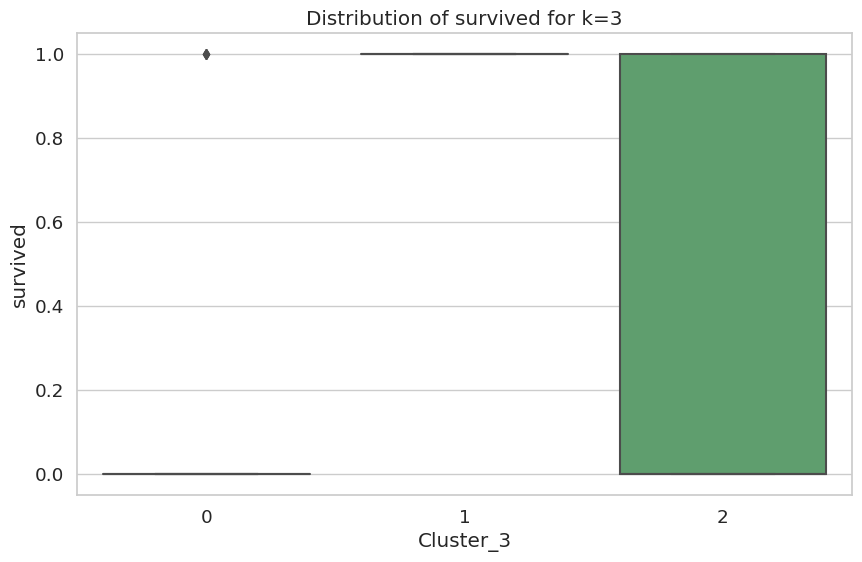

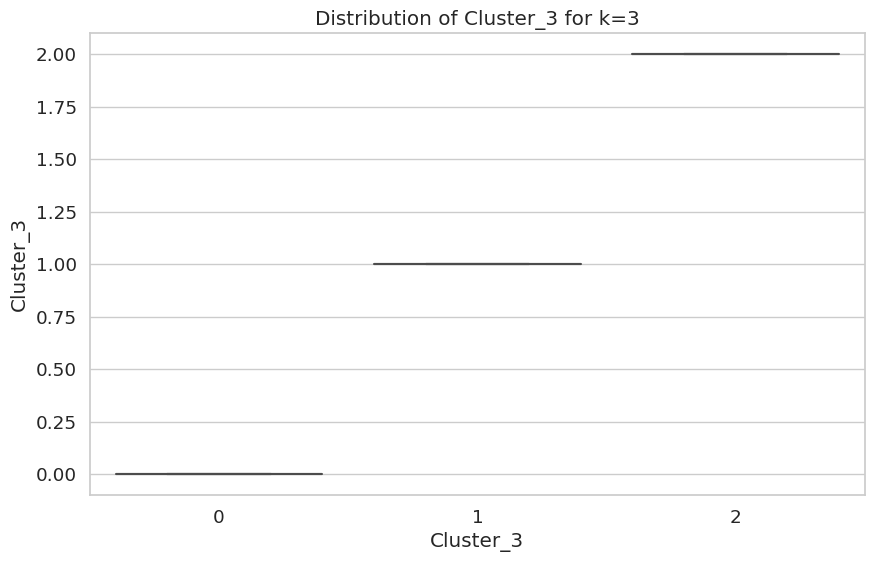

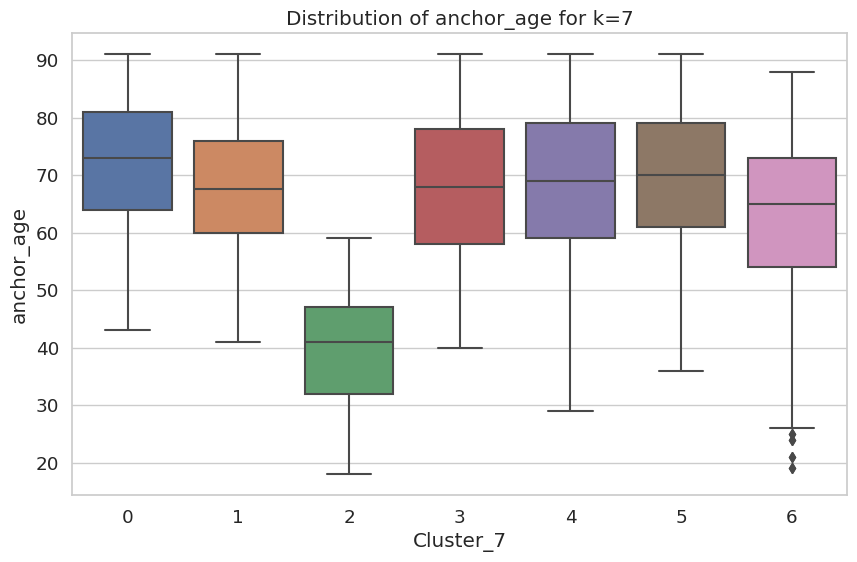

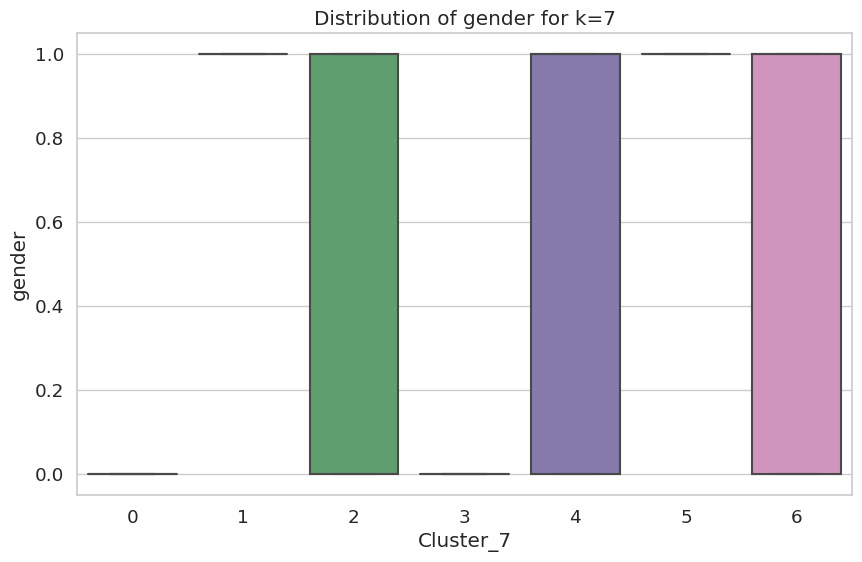

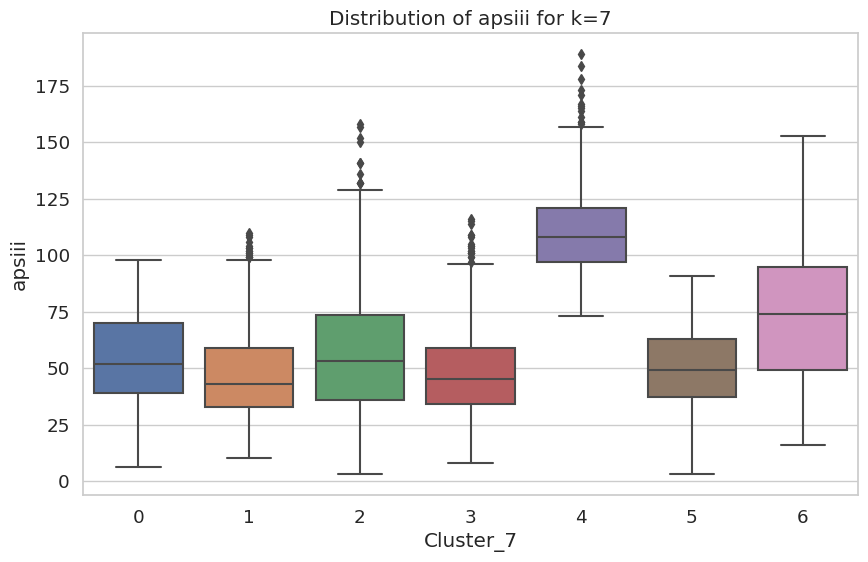

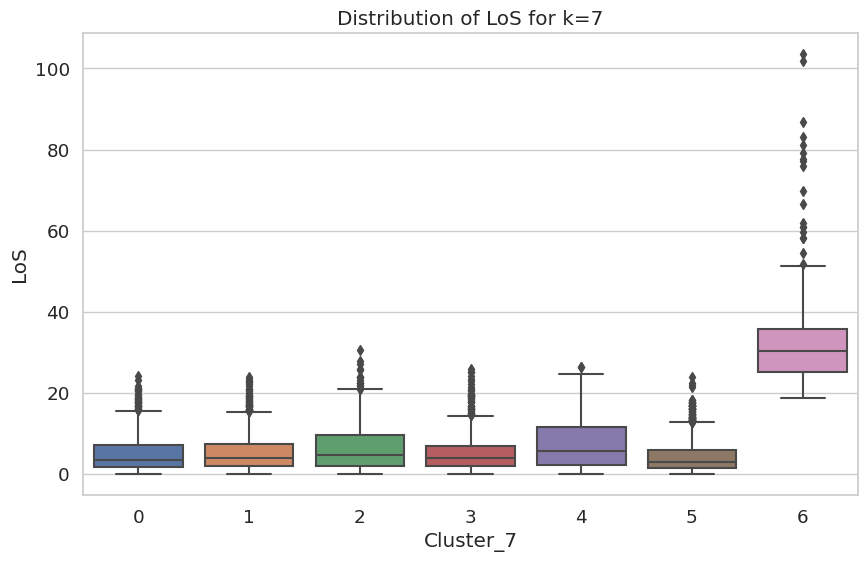

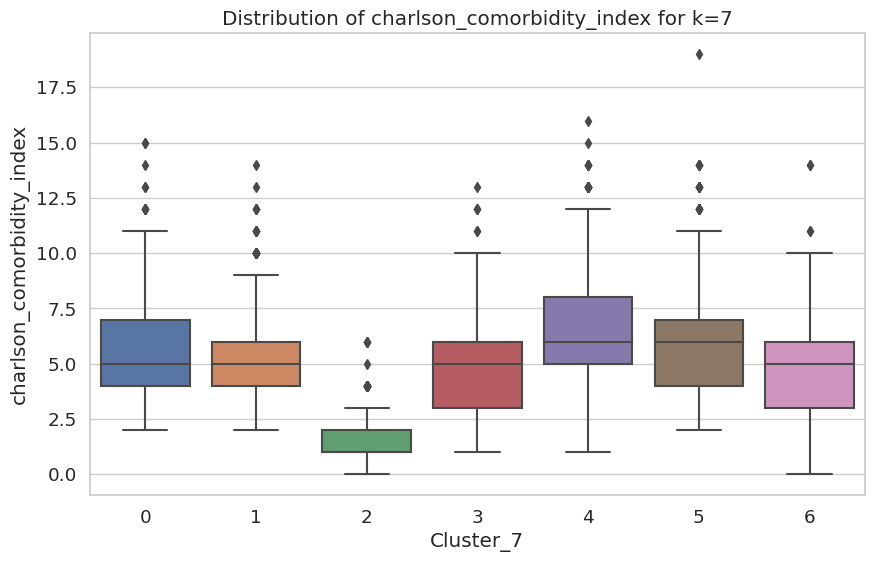

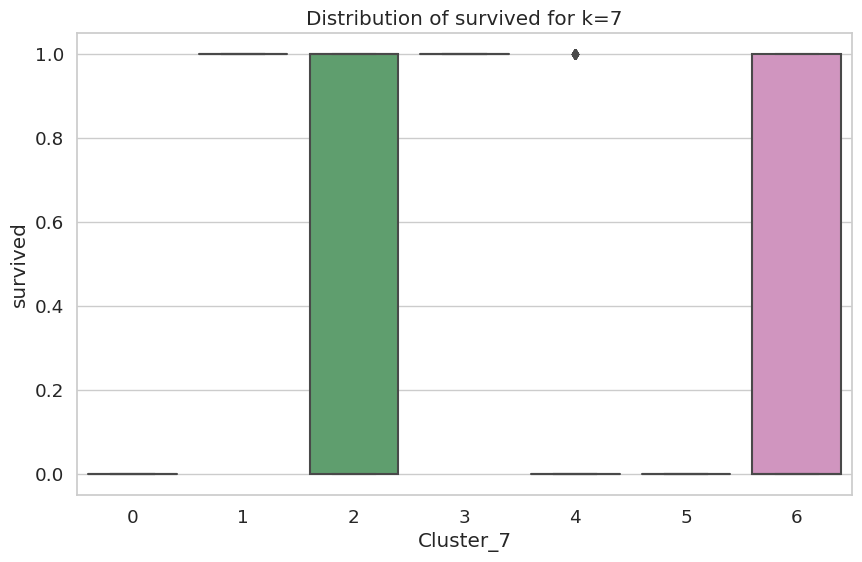

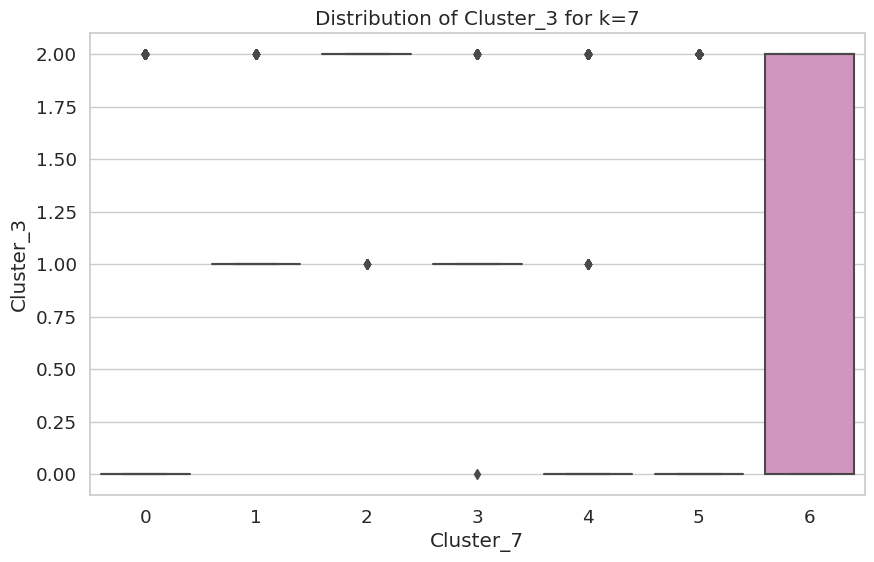

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for k in k_values:
    for column in cohort_df.columns[:-1]:  # Exclude the cluster label columns
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=f'Cluster_{k}', y=column, data=cohort_df)
        plt.title(f'Distribution of {column} for k={k}')
        plt.show()
